# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [79]:
import matplotlib.pyplot as plt 
import numpy as np
import scipy.signal
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

Файлы с расширением **.wav** (Waveform Audio File Format) используются для хранения оцифрованных аудиоданных, таких как музыка, звуковые эффекты и голосовые записи. Этот формат был разработан IBM и Microsoft и поддерживает различные параметры дискретизации и квантования, что делает его популярным в профессиональной аудиопродукции.

## Содержимое .wav файла

Файлы WAV обычно состоят из двух основных секций:
- **Секция формата (`fmt`)**: содержит информацию о параметрах аудиосигнала, таких как частота дискретизации, количество каналов и битовая глубина.
- **Секция данных (`data`)**: хранит сами аудиоданные в виде цифровых выборок.

WAV файлы могут содержать данные с различными частотами дискретизации, например, от 8 кГц до 192 кГц, и битовой глубиной от 8 до 32 бит. Наиболее распространенные параметры включают 16 бит при частоте 44.1 кГц, что соответствует качеству звука компакт-дисков.

## Как узнать параметры дискретизации и квантования .wav файла

Чтобы определить параметры дискретизации и квантования WAV файла, можно использовать следующие методы:

1. **Аудиоредакторы**: Программы, такие как Audacity или Adobe Audition, позволяют открыть файл и просмотреть его свойства, включая частоту дискретизации и битовую глубину.
  
2. **Специальные утилиты**: Существуют утилиты для анализа аудиофайлов (например, MediaInfo), которые могут предоставить детальную информацию о формате WAV файла.

3. **Программный анализ**: Можно написать скрипт на Python или другом языке программирования для чтения заголовка WAV файла. Заголовок содержит информацию о формате в первых 44 байтах. Например:

```python
def read_wav_header(file_path):
    with open(file_path, 'rb') as f:
        header = f.read(44)
        # Извлечение параметров
        sample_rate = int.from_bytes(header[24:28], 'little')
        bits_per_sample = int.from_bytes(header[34:36], 'little')
        return sample_rate, bits_per_sample

sample_rate, bits_per_sample = read_wav_header('example.wav')
print(f'Частота дискретизации: {sample_rate} Гц, Битовая глубина: {bits_per_sample} бит')
```

Этот код открывает файл WAV и извлекает частоту дискретизации и битовую глубину из заголовка.

### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

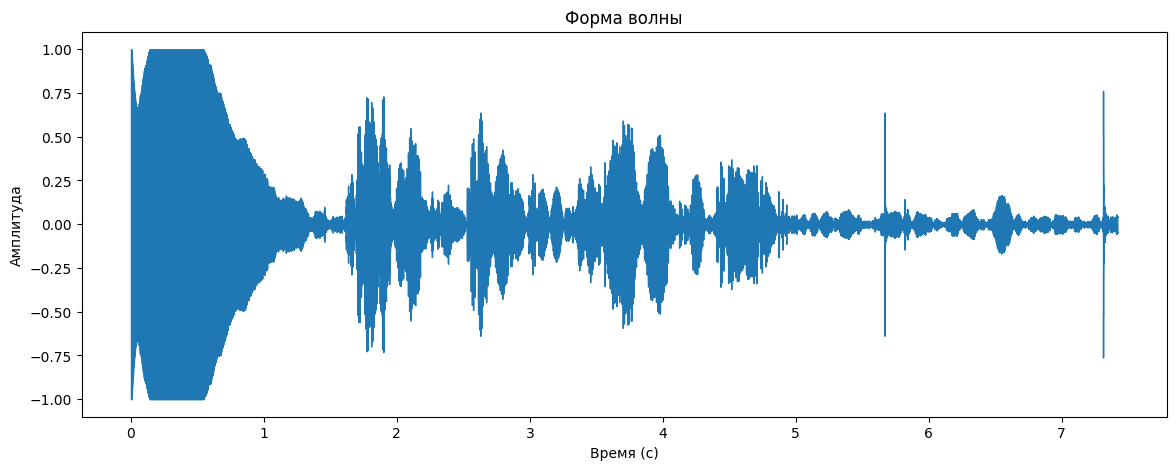

In [2]:
import librosa
import matplotlib.pyplot as plt

# Загрузка аудиофайла
audio_path = 'my_voice.wav'
y, sr = librosa.load(audio_path, sr=None)

# Построение формы волны
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Форма волны')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.show()

In [4]:
from IPython.display import Audio

# Воспроизведение аудиофайла
Audio(audio_path)

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

Формат **.wav** (Waveform Audio File Format) отличается от других аудиоформатов, таких как **.mp3** и **.ogg**, по нескольким ключевым характеристикам, включая способ сжатия, качество звука и размер файлов.

## Основные отличия

### 1. **Тип сжатия**
- **WAV**: Это формат **несжатого** аудио, что означает, что он сохраняет все аудиоданные без потерь. WAV файлы обеспечивают высокое качество звука, поскольку они представляют собой точную копию оригинального аудиосигнала.
- **MP3**: Это формат **сжатия с потерями**, который уменьшает размер файла, удаляя некоторые данные, которые считаются несущественными для восприятия. Это приводит к меньшему качеству звука по сравнению с WAV, особенно на низких битрейтах.
- **OGG**: Также является форматом сжатия с потерями, но обычно обеспечивает лучшее качество звука при том же размере файла по сравнению с MP3 благодаря более эффективным алгоритмам кодирования (например, Vorbis).

### 2. **Размер файла**
- **WAV**: Файлы WAV значительно больше по размеру из-за отсутствия сжатия. Например, один минутный трек в формате WAV может занимать около 10 МБ при частоте дискретизации 44.1 кГц и 16 битах.
- **MP3**: Файлы MP3 могут быть в 10 раз меньше по размеру по сравнению с WAV, что делает их более удобными для хранения и передачи.
- **OGG**: Файлы OGG также меньше, чем WAV, и могут быть сопоставимы или даже меньше по размеру, чем MP3 при аналогичном качестве звука.

### 3. **Качество звука**
- **WAV**: Предоставляет максимальное качество звука без потерь и считается стандартом для профессиональной записи и редактирования аудио.
- **MP3**: Качество звука зависит от битрейта; на низких битрейтах (например, 128 кбит/с) звук может быть заметно хуже.
- **OGG**: Обычно обеспечивает лучшее качество звука по сравнению с MP3 на аналогичных битрейтах.

### 4. **Использование**
- **WAV**: Идеален для профессиональной работы со звуком, такой как запись и редактирование музыки или звуковых эффектов.
- **MP3**: Широко используется для потокового аудио и хранения музыки на мобильных устройствах из-за своей компактности.
- **OGG**: Часто используется в потоковых сервисах (например, Spotify) и играх благодаря своему качеству и меньшему размеру файлов.

## Заключение
Выбор между WAV, MP3 и OGG зависит от ваших потребностей: если вам нужно сохранить максимальное качество звука — выбирайте WAV; если важен размер файла и удобство — используйте MP3 или OGG.

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [18]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [19]:
# Читаем данные с подготовленными сигналами
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

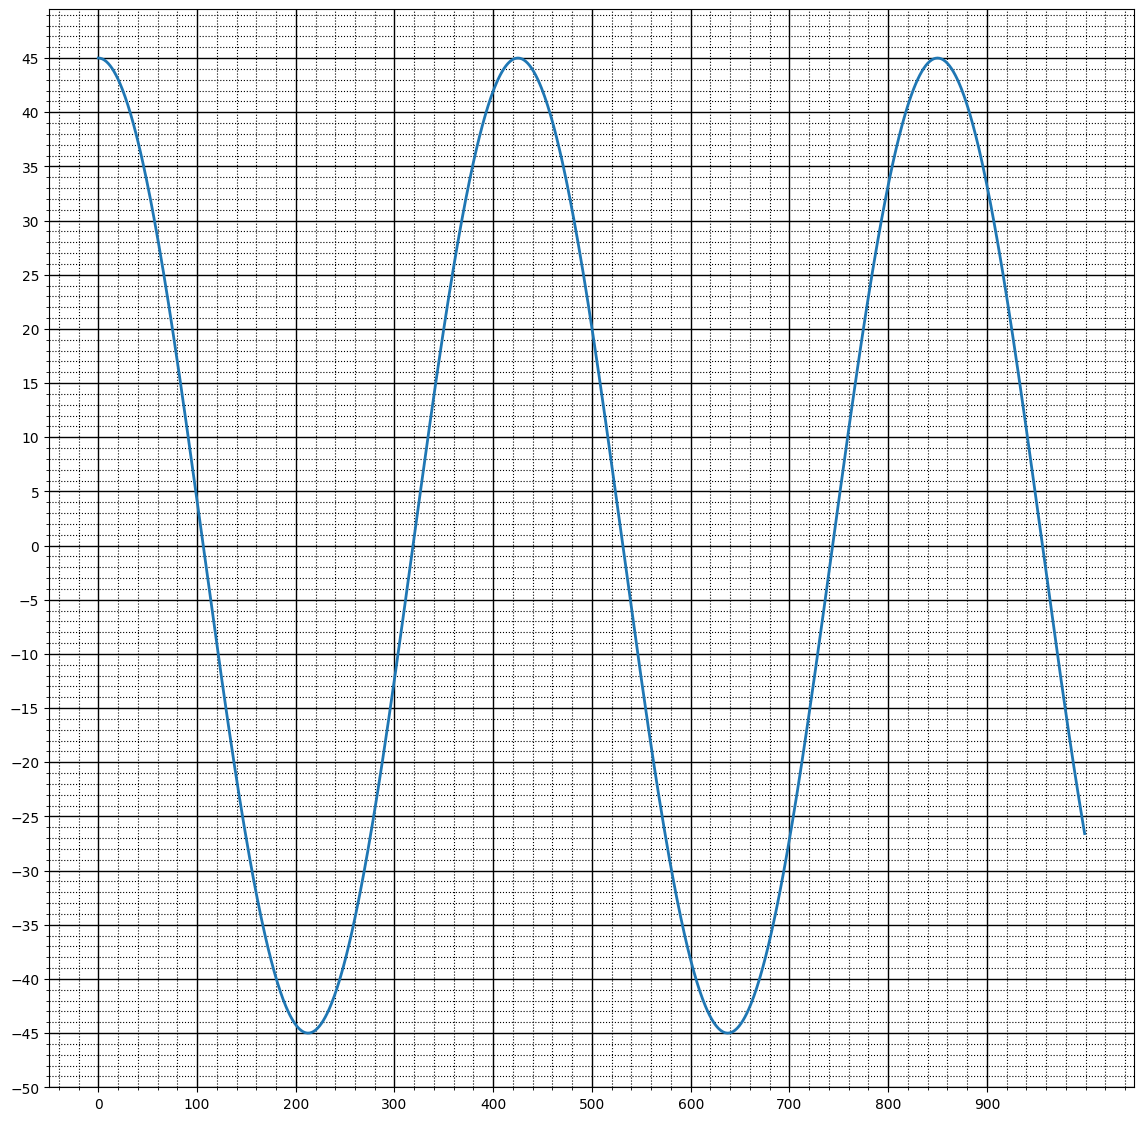

In [13]:
draw_signal(test_data['task2']['a'])

In [55]:
# YOUR CODE HERE
A_a = 45 # Попробуйте другую амплитуду
T_a = 425
omega_a = (2 * np.pi) / T_a # угловая частота
phi_a = np.pi / 2

# Время от 0 до 999 (1000 отсчетов)
t = np.arange(1000)

# Генерация сигнала a
a = A_a * np.sin(omega_a * t + phi_a)

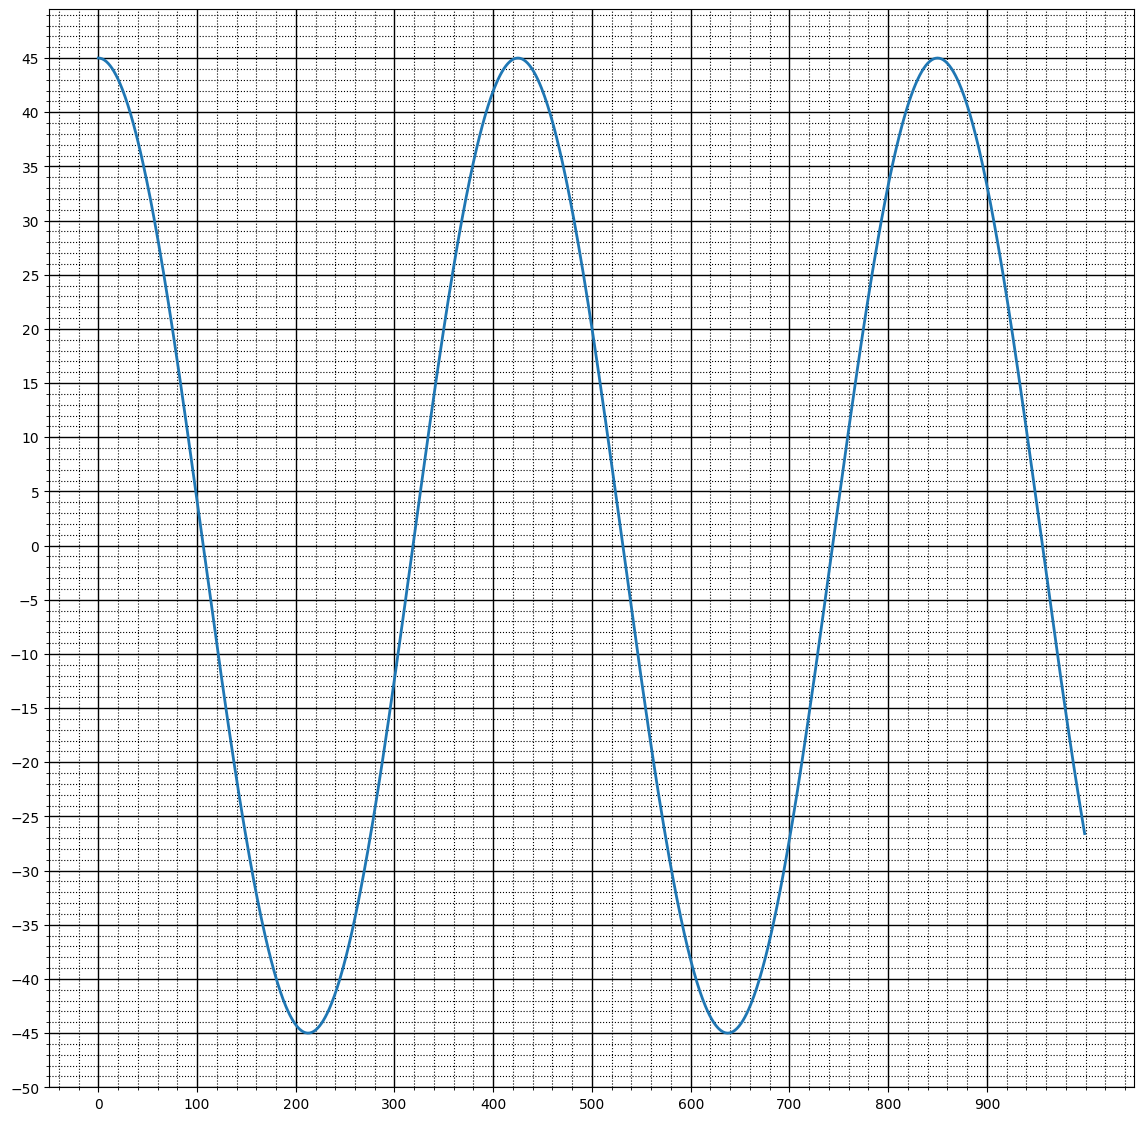

In [56]:
draw_signal(a)

In [57]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= $45

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = $0.0147839654

3. Фаза - $\phi = \frac{\pi}{2}$

### Сигнал ***b***

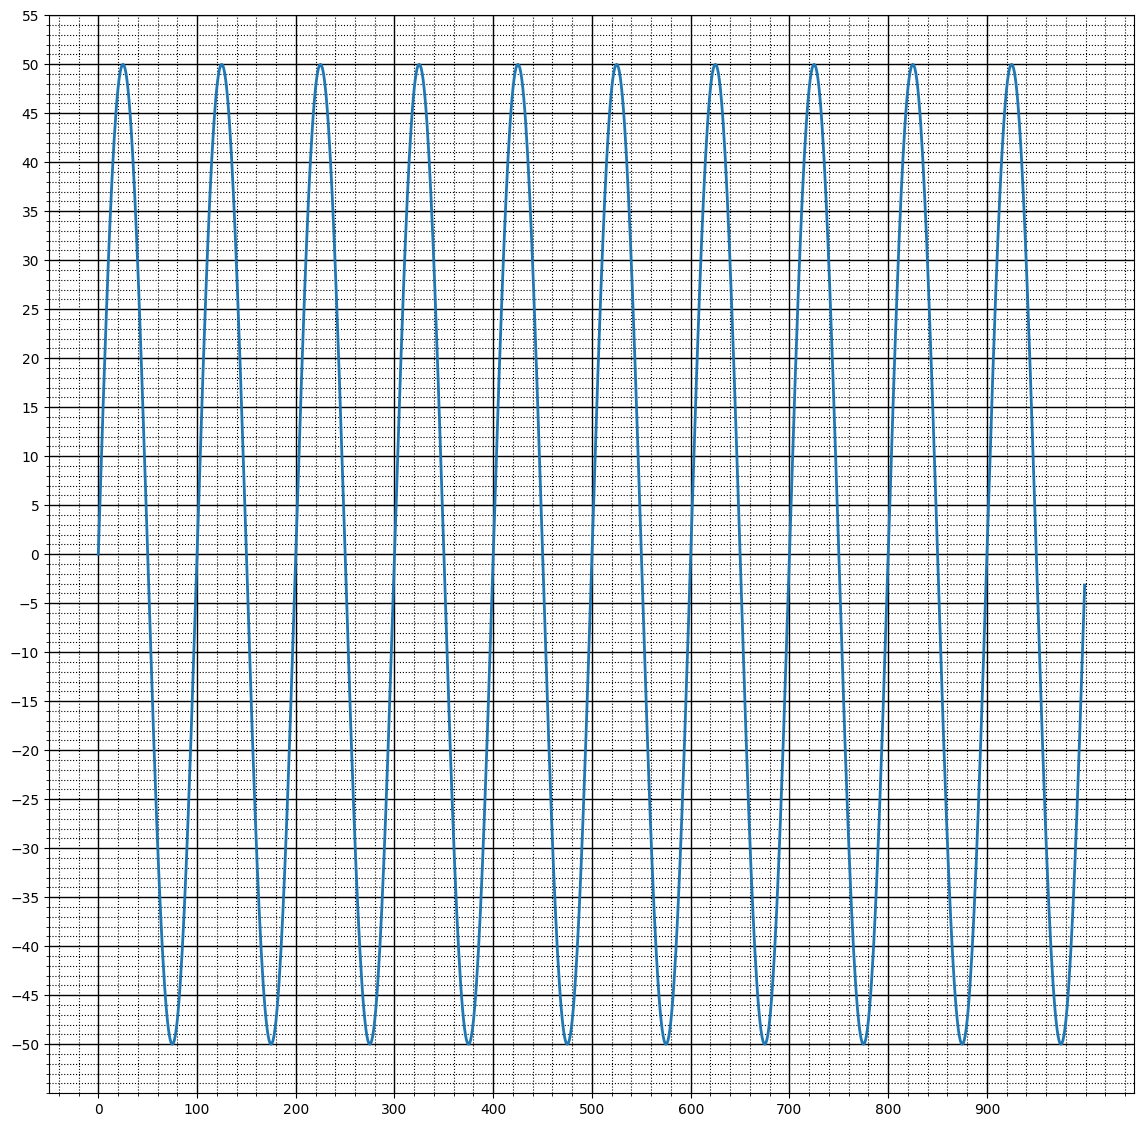

In [58]:
draw_signal(test_data['task2']['b'])

In [60]:
# YOUR CODE HERE
A_b = 50
T_b = 100
omega_b = (2 * np.pi) / T_b
phi_b = 0

t = np.arange(1000)

b = A_b * np.sin(omega_b * t + phi_b)

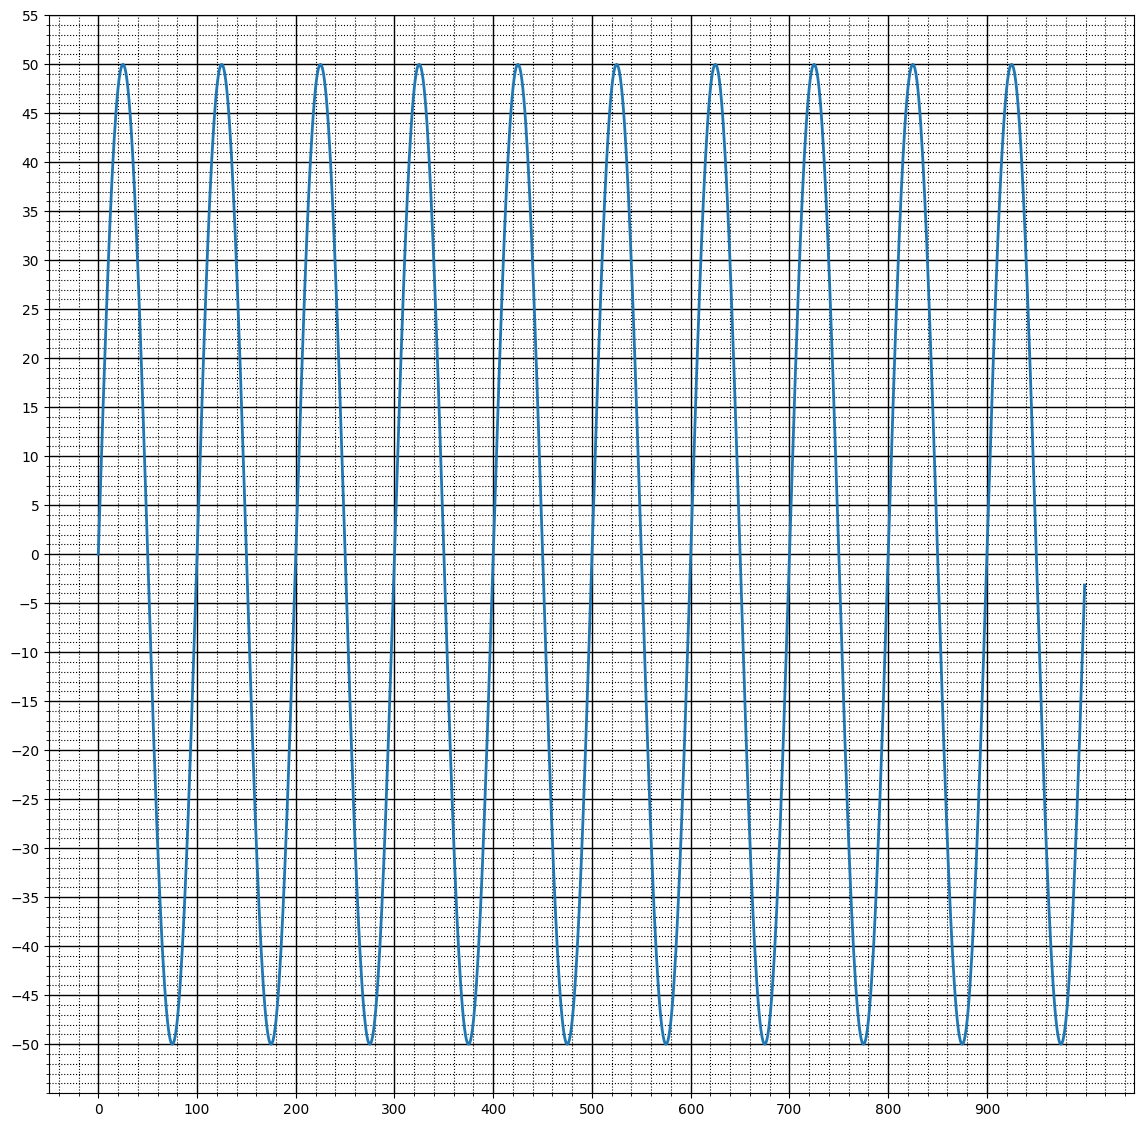

In [61]:
draw_signal(b)

In [62]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= $50

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = $0.0628318531

3. Фаза - $\phi= $0

### Сигнал ***c***

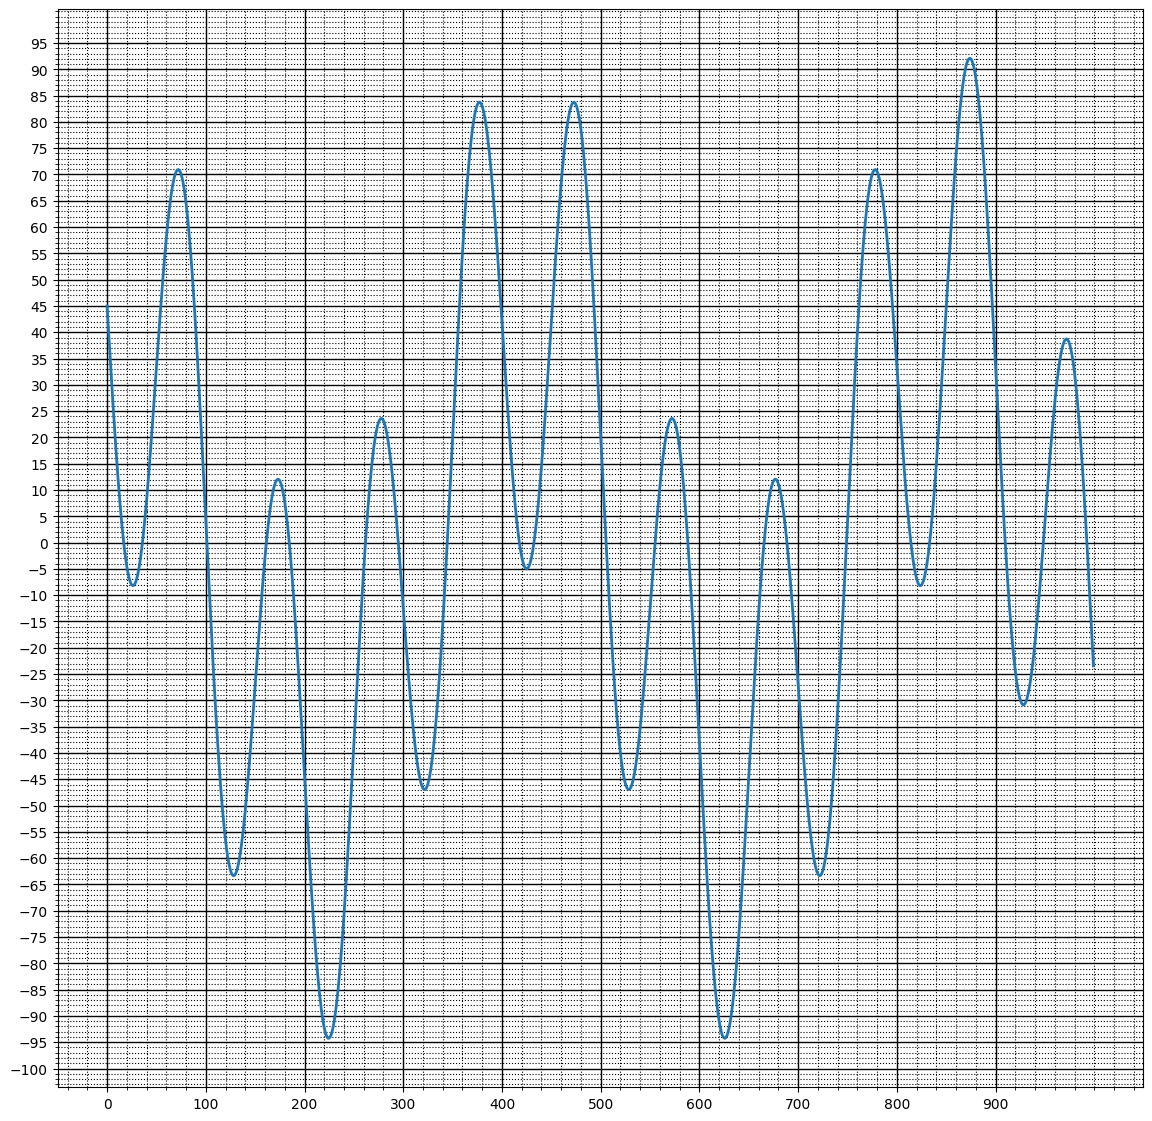

In [63]:
draw_signal(test_data['task2']['c'])

In [73]:
# сигнал состоит из двух гармоник
# YOUR CODE HERE
'''
A1_c = 71
T1_c = 710
omega1_c = (2 * np.pi) / T1_c
phi1_c = np.pi / 2

A2_c = 84
T2_c = 100
omega2_c = (2 * np.pi) / T2_c
phi2_c = np.pi / 2

t = np.arange(1000)

c1 = A1_c * np.sin(omega1_c * t + phi1_c)
c2 = A2_c * np.sin(omega2_c * t + phi2_c)
c = c1 + c2
'''
c = a - b

In [74]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [81]:
def convolve(in1, in2):
    #YOUR CODE HERE
        # Длина выходного сигнала
    output_length = len(in1) + len(in2) - 1
    # Инициализация выходного массива нулями
    output = np.zeros(output_length)

    # Выполнение операции свёртки
    for i in range(len(in1)):
        output[i:i+len(in2)] += in1[i] * in2  # Сдвигаем фильтр и умножаем

    return output

In [82]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [83]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [84]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

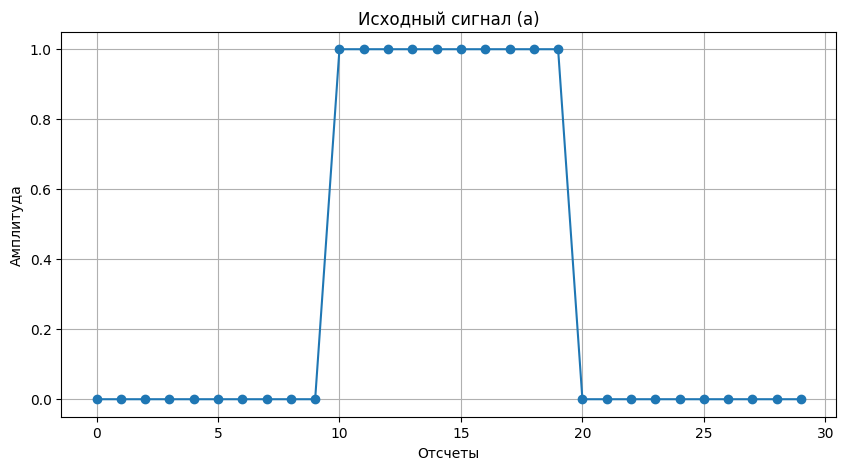

In [98]:
# YOUR CODE HERE
# Создание сигнала a
a = np.repeat([0, 1, 0], 10)  # Исходный сигнал

# Визуализация сигнала a
plt.figure(figsize=(10, 5))
plt.title('Исходный сигнал (a)')
plt.plot(a, marker='o')  # Используем линии с маркерами
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()


Сигнал **b**

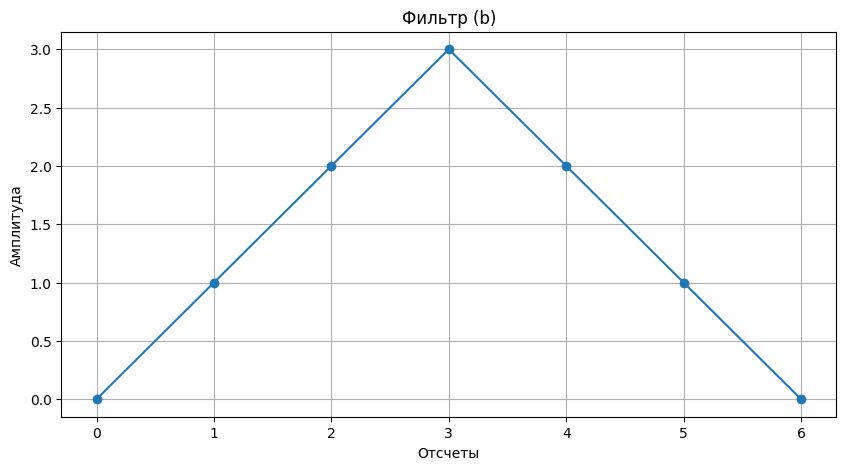

In [99]:
# YOUR CODE HERE
# Создание фильтра b
b = np.array([0, 1, 2, 3, 2, 1, 0])  # Фильтр

# Визуализация фильтра b
plt.figure(figsize=(10, 5))
plt.title('Фильтр (b)')
plt.plot(b, marker='o')  # Используем линии с маркерами
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()

Свертка **a** и **b**

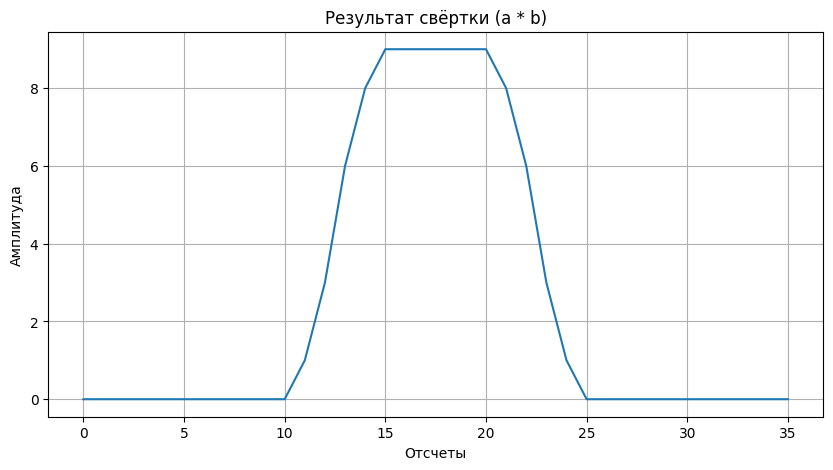

In [100]:
# YOUR CODE HERE
# Функция для свёртки
def convolve(in1, in2):
    output_length = len(in1) + len(in2) - 1
    output = np.zeros(output_length)
    for i in range(len(in1)):
        output[i:i + len(in2)] += in1[i] * in2
    return output

# Выполнение свёртки
result = convolve(a, b)

# Визуализация результата свёртки
plt.figure(figsize=(10, 5))
plt.title('Результат свёртки (a * b)')
plt.plot(result)  # Используем линии для результата свёртки
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()

Все 3 графика на одной картинке:

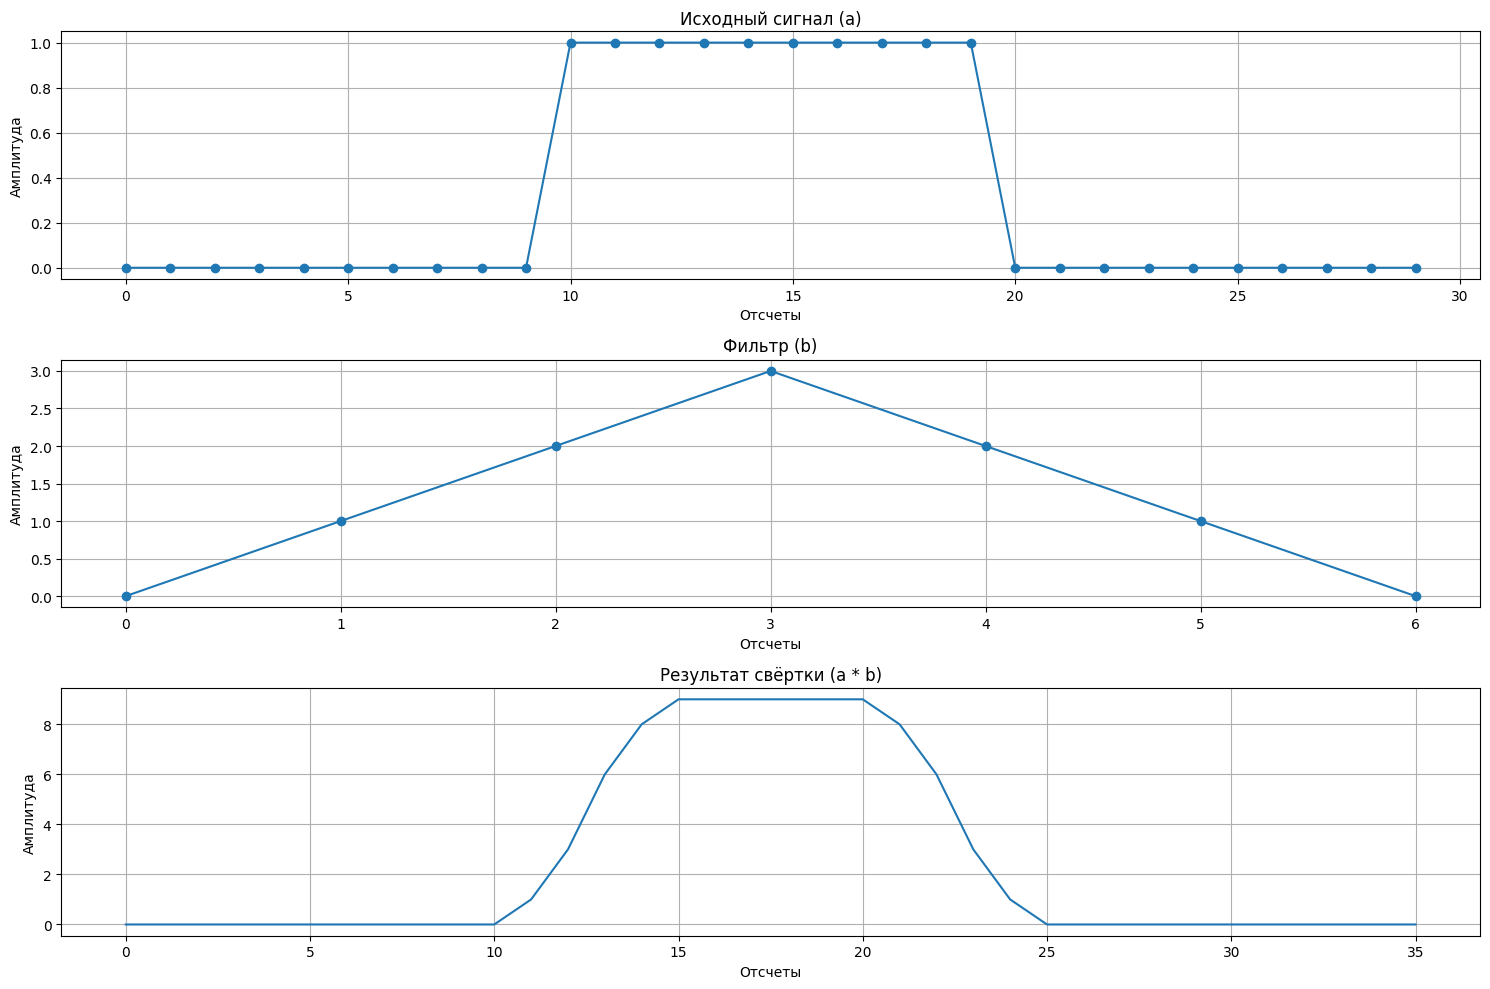

In [103]:
# Построение всех трех графиков на одной картинке
plt.figure(figsize=(15, 10))

# График сигнала a
plt.subplot(3, 1, 1)
plt.title('Исходный сигнал (a)')
plt.plot(a, marker='o')  # Используем линии с маркерами
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.grid()

# График фильтра b
plt.subplot(3, 1, 2)
plt.title('Фильтр (b)')
plt.plot(b, marker='o')  # Используем линии с маркерами
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.grid()

# График результата свёртки
plt.subplot(3, 1, 3)
plt.title('Результат свёртки (a * b)')
plt.plot(result)  # Используем линии для результата свёртки
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.grid()

# Подгонка макета
plt.tight_layout()
plt.show()

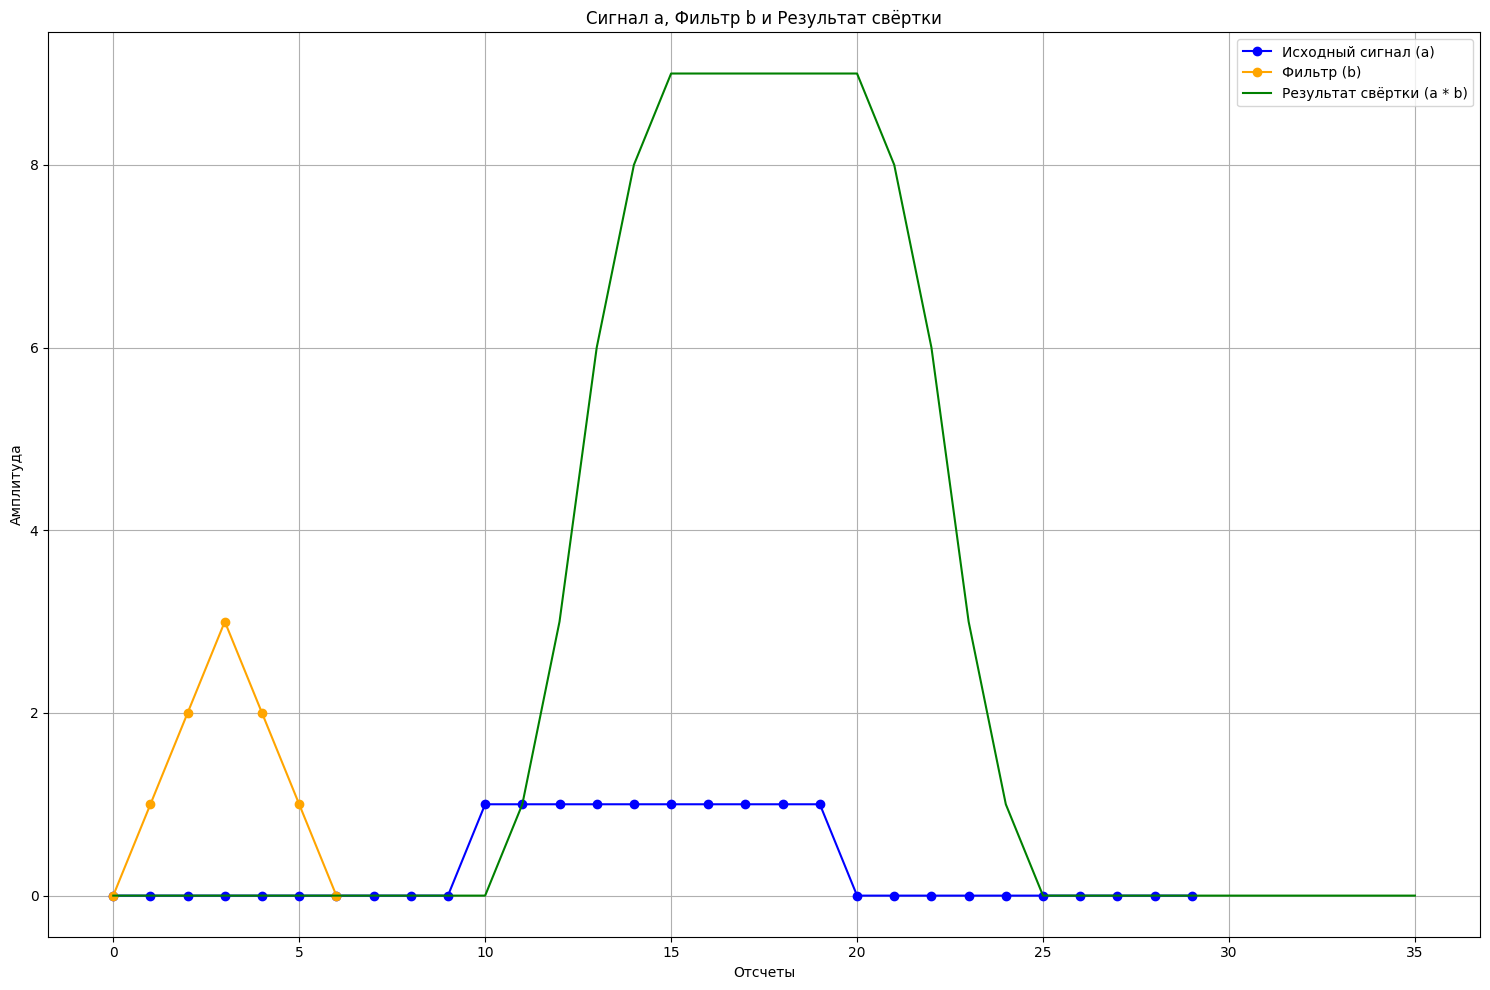

In [102]:
# YOUR CODE HERE
# Построение всех трех графиков на одной оси координат
plt.figure(figsize=(15, 10))

# График сигнала a
plt.plot(a, label='Исходный сигнал (a)', color='blue', marker='o')

# График фильтра b (нормализуем для отображения)
plt.plot(b, label='Фильтр (b)', color='orange', marker='o')

# График результата свёртки
plt.plot(result, label='Результат свёртки (a * b)', color='green')

# Настройка графика
plt.title('Сигнал a, Фильтр b и Результат свёртки')
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [95]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise 
    # YOUR CODE HERE
    y = np.zeros(N)
    
    # Заполнение начальной части выходного сигнала шумом
    y[:len(noise)] = noise
    
    # Применение усреднителя к шуму
    for n in range(len(noise), N):
        # Используем усреднение двух смежных отсчетов
        y[n] = 0.5 * (y[n - 1] + y[n - len(noise)])  # Усреднение двух смежных отсчетов

    return y
   

    # raise NotImplementedError()

In [96]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

AssertionError: Out of range samples eq 0.

### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [ ]:
# YOUR CODE HERE

Визуализируем затухание амплитуды:

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

In [ ]:
# YOUR CODE HERE